**Exercise 4: Image descriptors**

*CPSC 480/580: Computer Vision*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises
```

4. Move the 04_exercise.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 480-580: Computer Vision/Exercises/04_exercise.ipynb
```

In this exercise, we will implement histogram of oriented gradients (HOG) and apply HOG and Scale Invariant Feature Transform (SIFT). We will also test SIFT for matching features across images.

**Submission**:

1. Implement all TODOs in the code blocks below.

2. Run the Colab Notebook to produce results for each code block.

3. List any collaborators.

```
Collaborators: Doe, Jane (Please write names in <Last Name, First Name> format)

Collaboration details: Discussed ... implementation details with Jane Doe.
```

Import packages

In [ ]:
import skimage.feature
import skimage.filters
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt

Utility functions for plotting

In [ ]:
def config_plot():
    '''
    Function to remove axis tickers and box around figure
    '''

    plt.box(False)
    plt.axis('off')

Loading data

In [ ]:
# Load coffee image from skimage
image_coffee = skimage.data.coffee()

# Load astronaunt image from skimage
image_astronaunt = skimage.data.chelsea()

images = [image_coffee, image_astronaunt]
images_gray = [None] * len(images)

# Create gray (if images aren't already) images
for idx, image in enumerate(images):

    # Convert images to gray if it isn't already
    if len(image.shape) > 2 and image.shape[-1] > 1:
        image_gray = skimage.color.rgb2gray(image)
        pass
    else:
        image_gray = image

    images_gray[idx] = image_gray

Computing gradients and orientation

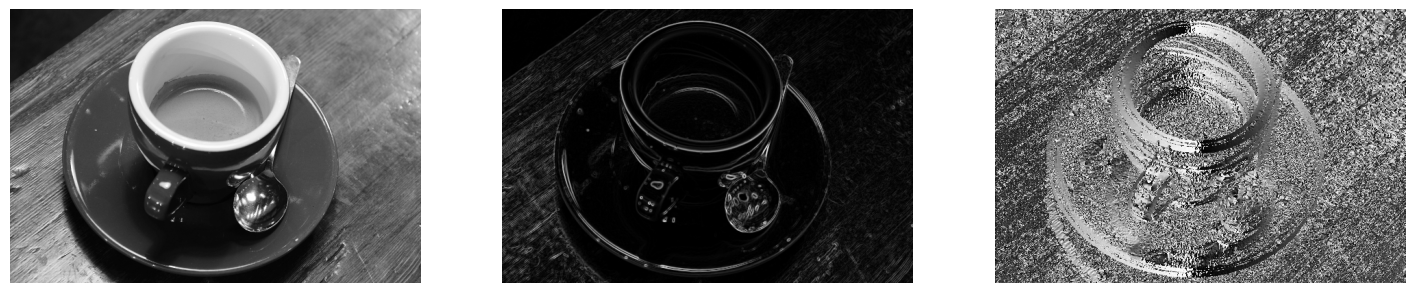

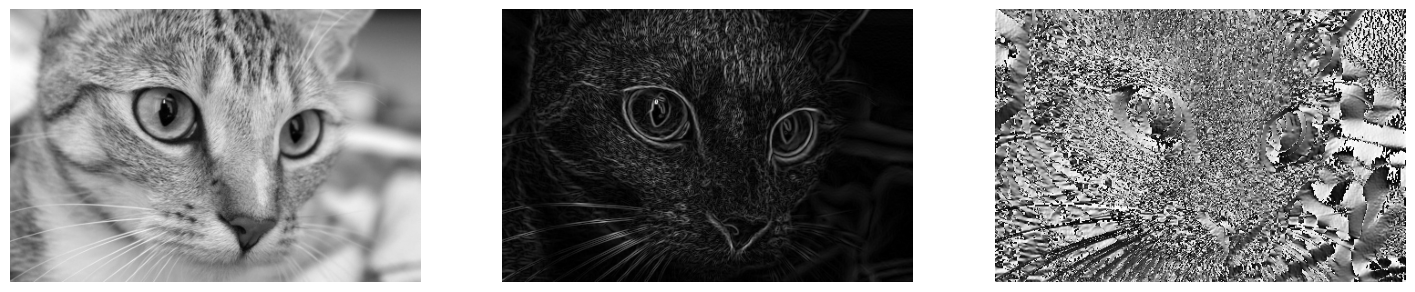

In [ ]:
histogram_angles = [
    0, 20, 40, 60, 80, 100, 120, 130, 160
]
histogram_distance = 20

for image_gray in images_gray:

    # TODO: Run sobel filters to get gradients
    gradients_x = skimage.filters.sobel_h(image_gray)
    gradients_y = skimage.filters.sobel_v(image_gray)

    # TODO: Compute magnitude
    magnitude = np.sqrt(gradients_x **2 + gradients_y ** 2)

    # TODO: Obtain unsigned orientation
    orientation = np.arctan2(gradients_y, gradients_x + 1e-8)
    orientation = np.rad2deg(orientation) % 180

    # TODO: Define histogram block
    orientation_block = orientation[0:4, 0:4]

    # TODO: For each block
    histogram_block = np.zeros(len(histogram_angles))

    for block_y in range(4):
      for block_x in range(4):

        found = False
        angle = orientation[block_y, block_x]

        # TODO: Determine the histogram bin

        for bin_idx in range(1,len(histogram_angles)):
          histogram_angle_curr = histogram_angles[bin_idx]
          histogram_angle_prev = histogram_angles[bin_idx - 1]

          delta = angle - histogram_angle_curr

          if delta < 0:
            alpha = (angle - histogram_angle_prev) / histogram_distance
            histogram_block[bin_idx] += alpha * magnitude[block_y, block_x]
            histogram_block[bin_idx - 1] += (1 - alpha) * magnitude[block_y, block_x]

            found = True
            break
          if not found:
            # must be last-180
            delta = 180 - angle
            alpha = delta / histogram_distance
            histogram_block[0]


            # Create visualization
    fig = plt.figure(figsize=(18, 8))

    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(image_gray, cmap='gray')
    config_plot()

    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(magnitude, cmap='gray')
    config_plot()

    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(orientation, cmap='gray')
    config_plot()

plt.show()

Histogram of Oriented Gradients (HOG)

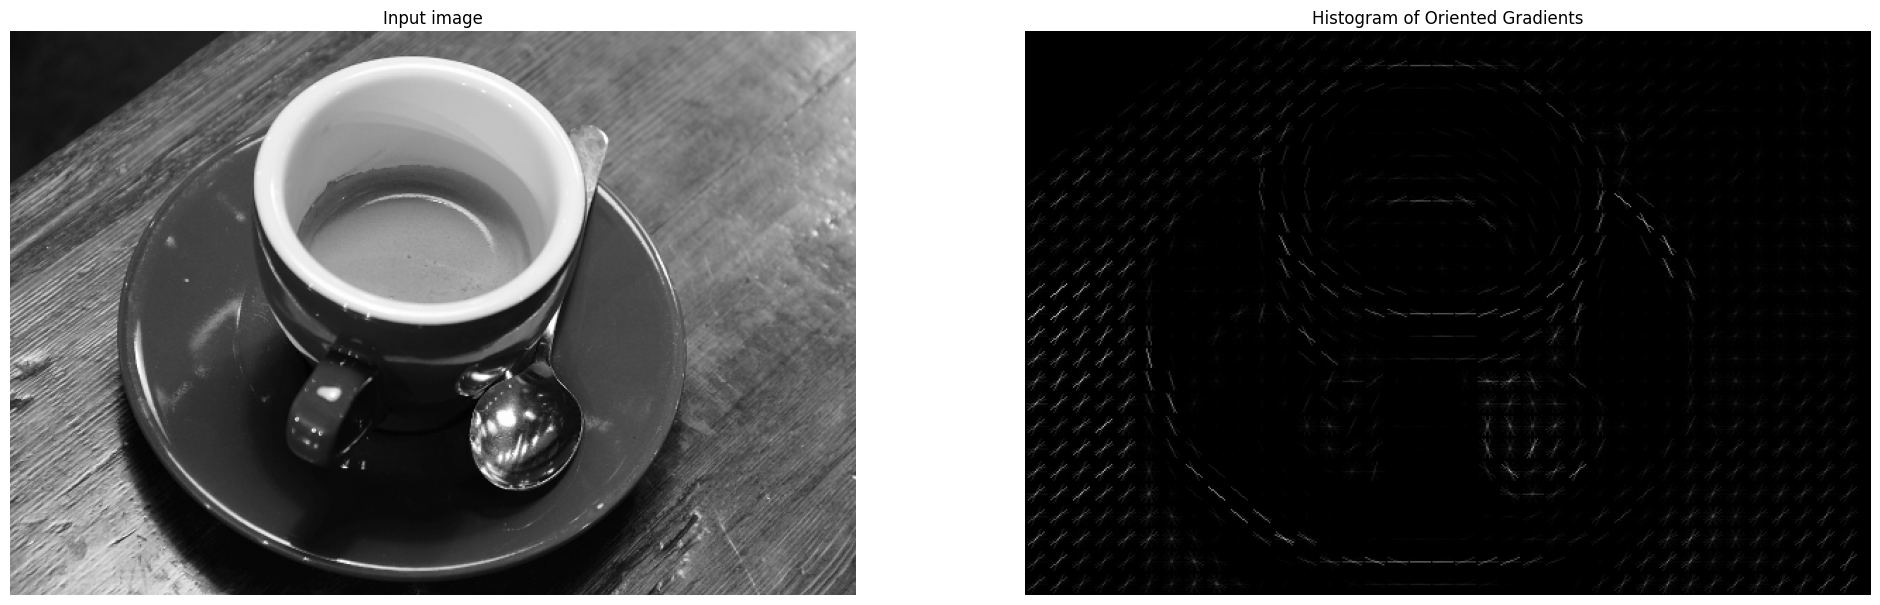

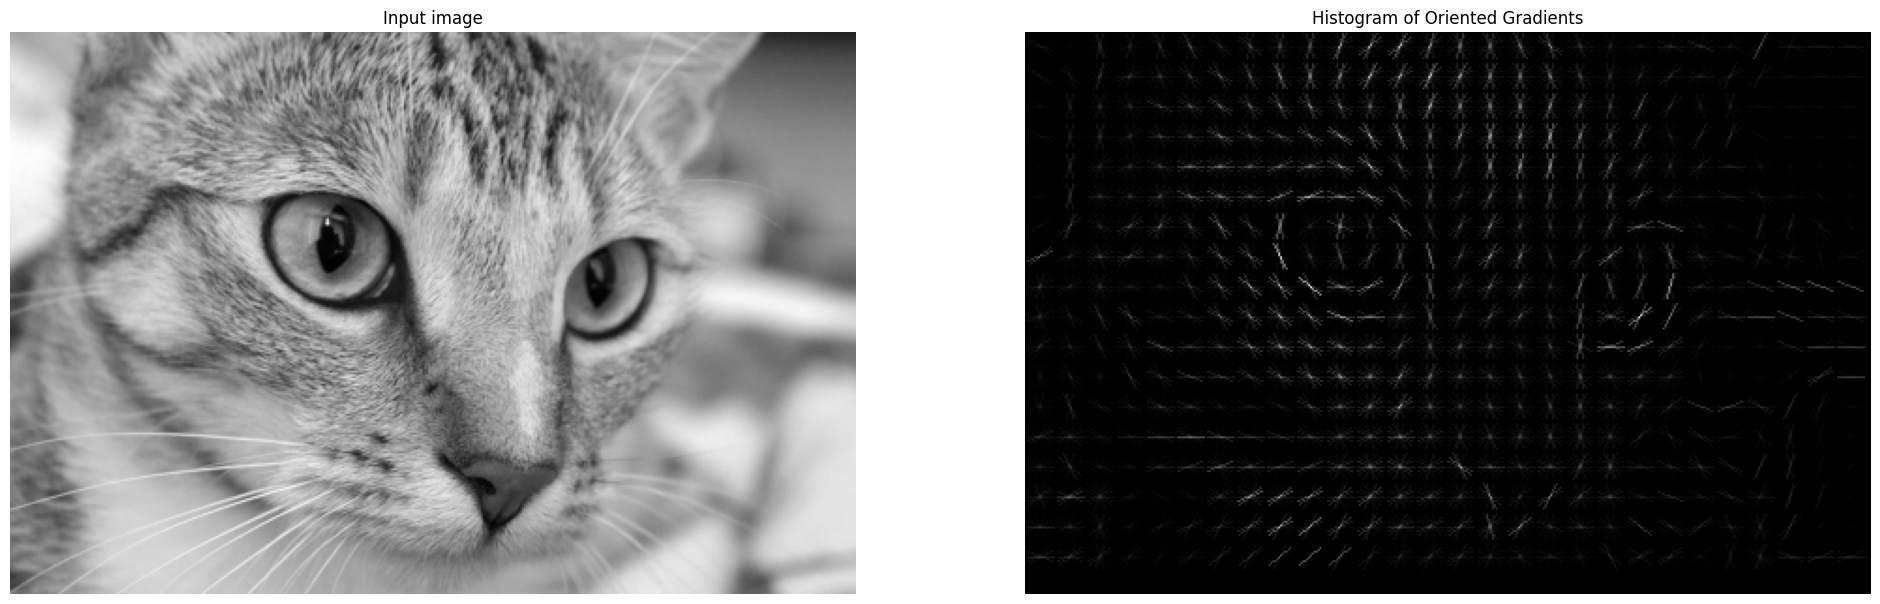

In [ ]:
for image_gray in images_gray:

    # TODO: Apply skimage.feature.hog to each gray image with
    # 9 orientations, 16x16 pixels per cell, 2x2 cells per block, set visualize to True
    fd, hog_image = skimage.feature.hog(
        image_gray,
        orientations=9,
        pixels_per_cell=(16, 16),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True,
        feature_vector=True
    )

    # TODO: Create a figure of size 24 x 12 with 2 subplots
    fig = plt.figure(figsize=(24, 12))

    # TODO: Visualize input image using gray cmap
    # Set title to be Input image
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(image_gray, cmap='gray')
    ax.set_title("Input image")
    config_plot()

    # TODO: Visualize HOG using gray cmap
    # Note: normalize HOG image by its max and set vmin to 0 and vmax to 1
    # Set title to be Histogram of Oriented Gradients
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(hog_image / (hog_image.max() + 1e-8), cmap='gray', vmin=0, vmax=1)
    ax.set_title("Histogram of Oriented Gradients")
    config_plot()

plt.show()



SIFT feature matching

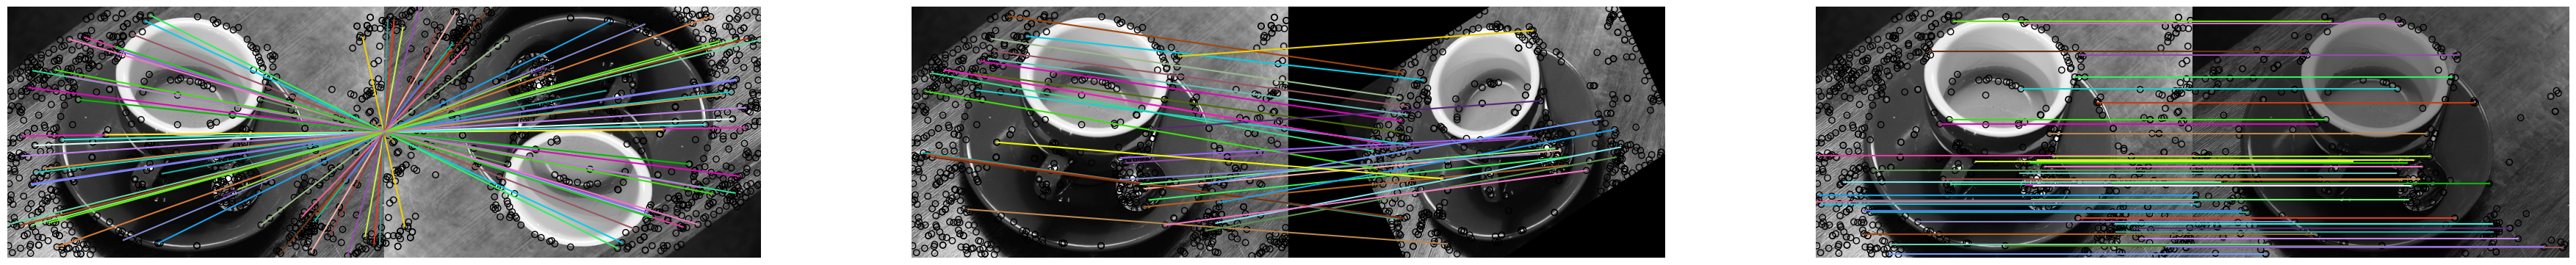

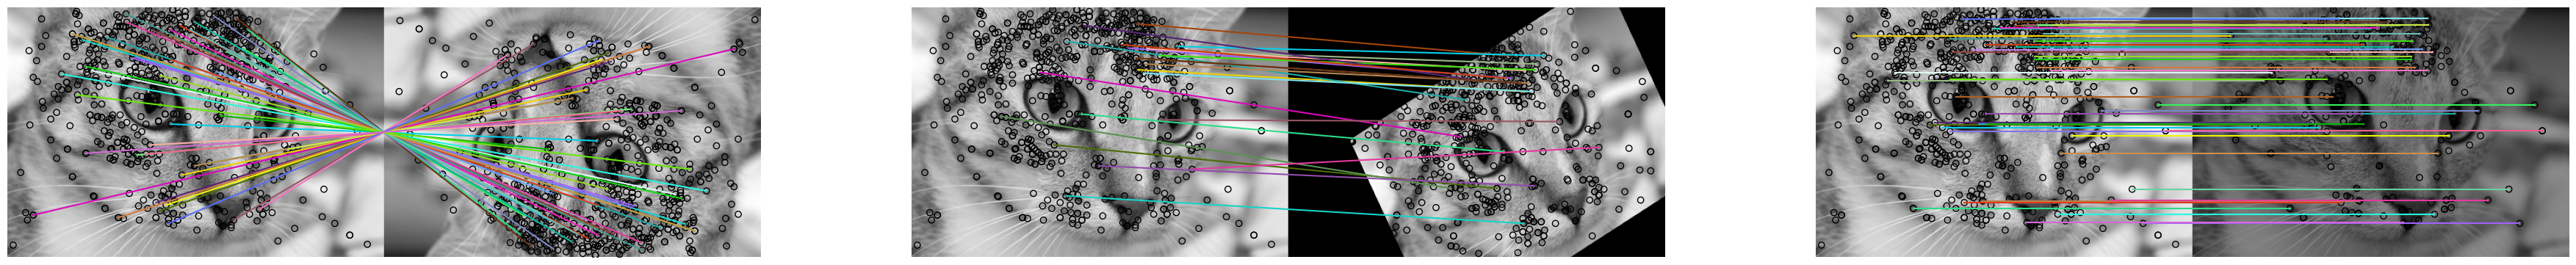

In [ ]:
for image_gray in images_gray:

    # TODO: Rotate the image by 180 degrees using skimage
    image_rotated = skimage.transform.rotate(image_gray, angle = 180)

    # TODO: Apply affine transformation with parameters:
    # scale=(1.3, 1.1), rotation=0.5 radians, translation=(0, -200)
    image_affine = skimage.transform.AffineTransform(
        scale = (1.3, 1.1),
        rotation=0.5,
        translation=(0,-200)
    )
    image_affine = skimage.transform.warp(image_gray, image_affine)

    # TODO: Reduce intensity of image by 40%
    image_darkened = 0.6 * image_gray

    # TODO: Instantiate SIFT descriptor
    sift = skimage.feature.SIFT()

    # TODO: Run SIFT on image, rotated image, affine transformed image, and darkened image
    sift.detect_and_extract(image_gray)
    keypoints_gray = sift.keypoints
    descriptors_gray = sift.descriptors
    descriptors_rot = None  # placeholder to keep template variable name present

    # TODO: Run SIFT on rotated image
    sift.detect_and_extract(image_rotated)
    keypoints_rot = sift.keypoints
    descriptors_rot = sift.descriptors

    # TODO: Run SIFT on affine transformed image
    sift.detect_and_extract(image_affine)
    keypoints_affine = sift.keypoints
    descriptors_affine = sift.descriptors

    # TODO: Run SIFT on darkened image
    sift.detect_and_extract(image_darkened)
    keypoints_darkened = sift.keypoints
    descriptors_darkened = sift.descriptors
    keypoints_darkened  # keep this name in scope to honor template

    # TODO: Match SIFT features between image and rotated image using Euclidean distance
    # using a max ratio of 0.2 between the closest two match before considering the match ambiguous
    # and cross check as True so only the the best matches from one image to the other and vice versa are returned
    matches_image_gray_rotated = skimage.feature.match_descriptors(
        descriptors1=descriptors_gray,
        descriptors2=descriptors_rot,
        metric='euclidean',
        max_ratio=0.2,
        cross_check=True
    )

    # TODO: Match SIFT features between image and affine transformed image using Euclidean distance
    # using a max ratio of 0.2 between the closest two match before considering the match ambiguous
    # and cross check as True so only the the best matches from one image to the other and vice versa are returned
    matches_image_gray_affine = skimage.feature.match_descriptors(
        descriptors1=descriptors_gray,
        descriptors2=descriptors_affine,
        metric='euclidean',
        max_ratio=0.2,
        cross_check=True
    )

    # TODO: Match SIFT features between image and affine transformed image using Euclidean distance
    # using a max ratio of 0.2 between the closest two match before considering the match ambiguous
    # and cross check as True so only the the best matches from one image to the other and vice versa are returned
    matches_image_gray_affine = skimage.feature.match_descriptors(
        descriptors1=descriptors_gray,
        descriptors2=descriptors_affine,
        metric='euclidean',
        max_ratio=0.2,
        cross_check=True
    )

    # TODO: Match SIFT features between image and darkened image using Euclidean distance
    # using a max ratio of 0.2 between the closest two match before considering the match ambiguous
    # and cross check as True so only the the best matches from one image to the other and vice versa are returned
    matches_image_gray_darkened = skimage.feature.match_descriptors(
        descriptors1=descriptors_gray,
        descriptors2=descriptors_darkened,
        metric='euclidean',
        max_ratio=0.2,
        cross_check=True
    )

    # Create visualization
    fig = None
    fig = plt.figure(figsize=(45, 20))

    # TODO: Visualize the 50 random matches between image and rotated image
    ax = fig.add_subplot(1, 3, 1)
    rand_idx = np.random.permutation(len(matches_image_gray_rotated))[:min(50, len(matches_image_gray_rotated))]
    random_matches = matches_image_gray_rotated[rand_idx] if len(rand_idx) > 0 else matches_image_gray_rotated
    # use API compatible with many skimage versions
    skimage.feature.plot_matched_features(
        ax=ax,
        image0=image_gray,
        image1=image_rotated,
        keypoints0=keypoints_gray,
        keypoints1=keypoints_rot,
        matches=random_matches
    )
    config_plot()

    # TODO: Visualize all matches between image and affine transformed image
    ax = fig.add_subplot(1, 3, 2)
    random_matches = matches_image_gray_affine  # show all
    skimage.feature.plot_matched_features(
        ax=ax,
        image0=image_gray,
        image1=image_affine,
        keypoints0=keypoints_gray,
        keypoints1=keypoints_affine,
        matches=random_matches
    )
    config_plot()

    # TODO: Visualize the 50 random matches between image and darkened image
    ax = fig.add_subplot(1, 3, 3)
    rand_idx = np.random.permutation(len(matches_image_gray_darkened))[:min(50, len(matches_image_gray_darkened))]
    random_matches = matches_image_gray_darkened[rand_idx] if len(rand_idx) > 0 else matches_image_gray_darkened
    skimage.feature.plot_matched_features(
        ax=ax,
        image0=image_gray,
        image1=image_darkened,
        keypoints0=keypoints_gray,
        keypoints1=keypoints_darkened,
        matches=random_matches
    )
    config_plot()

plt.show()
